In [16]:
library(Seurat)
library(SeuratDisk)

options(Seurat.object.assay.version = "v3")
datafiles<-dir("/home/liusong/scRNA/endometriosis/V3data/Downloaded_NG_EUdata/matrix_data")
Alldata<-list()
for (i in 1:length(datafiles)){
        mymtx=paste0("/home/liusong/scRNA/endometriosis/V3data/Downloaded_NG_EUdata/matrix_data/",datafiles[i],"/matrix.mtx.gz")
        mybarcodes=paste0("/home/liusong/scRNA/endometriosis/V3data/Downloaded_NG_EUdata/matrix_data/",datafiles[i],"/barcodes.tsv.gz")
        myfeatures=paste0("/home/liusong/scRNA/endometriosis/V3data/Downloaded_NG_EUdata/matrix_data/",datafiles[i],"/features.tsv.gz")
        pbmc.data <-ReadMtx(mtx=mymtx,cells=mybarcodes,features=myfeatures,cell.column=1,feature.column=1,skip.cell=1)
        rb.genes <-rownames(pbmc.data)[grep("^RP[SL]",rownames(pbmc.data))]
        pbmc.data<-pbmc.data[!(rownames(pbmc.data) %in% rb.genes),]
        pbmc <- CreateSeuratObject(count = pbmc.data)
	metainfo<-read.csv(file=mybarcodes,sep="\t")
	mymeta<-metainfo[,c("DonorID","Binary.Stage","broad_celltypes","general_celltypes","fine_celltypes")]
	pbmc<- AddMetaData(pbmc,mymeta,col.name=c("DonorID","Phase","CellTypeA","CellTypeB","CellTypeC"))
	Alldata[[i]]<-pbmc
}
combined = merge(Alldata[[1]],y = Alldata[-1])

#conver to h5ad, for analyse in scanpy and integrate with our data
SaveH5Seurat(combined,filename="NG_EU_rawdata.h5seurat")
Convert("NG_EU_rawdata.h5seurat",dest="h5ad")
saveRDS(combined,file="NG_EU_rawdata_noRPL.rds")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with da

,orig.ident,nCount_RNA,nFeature_RNA,DonorID,Phase,CellTypeA,CellTypeB,CellTypeC
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
4861STDY7387181_AAACCTGAGGCATGGT,4861STDY7387181,11008,3758,A13,Proliferative,Stromal,eS,eS
4861STDY7387181_AAACCTGAGGGCACTA,4861STDY7387181,10222,3461,A13,Proliferative,Stromal,eS,eS
4861STDY7387181_AAACCTGAGTGAAGTT,4861STDY7387181,5532,2427,A13,Proliferative,Supporting,PV STEAP4,PV STEAP4
4861STDY7387181_AAACCTGAGTGGGCTA,4861STDY7387181,3642,1846,A13,Proliferative,Stromal,dS,dS
4861STDY7387181_AAACCTGCACCGAAAG,4861STDY7387181,3760,1742,A13,Proliferative,Stromal,eS,eS
4861STDY7387181_AAACCTGCACGAGAGT,4861STDY7387181,9097,3113,A13,Proliferative,Stromal,eS,eS


Regressing out nCount_RNA, percent.mt

Centering and scaling data matrix

PC_ 1 
Positive:  MKI67, TOP2A, UBE2C, BIRC5, AURKB, CDKN3, GTSE1, TYMS, NUSAP1, FAM64A 
	   TPX2, KIAA0101, CENPF, PRC1, RRM2, CDCA3, TK1, MXD3, SPC25, PTTG1 
	   MAD2L1, PBK, CDC20, ASPM, NUF2, CDK1, TACC3, CKAP2L, CCNA2, ZWINT 
Negative:  S100A6, PNRC1, SOD2, CFD, ID4, CEBPD, JUND, C11orf96, SERPING1, HSPA1A 
	   MTRNR2L12, APOD, ARID5B, NAMPT, HSPA1B, AKAP13, MYC, ZFP36, CEBPB, FOS 
	   KLF9, NFIL3, ALDH1A3, MTRNR2L1, NR2F1, DKK1, TMEM196, MT-ND3, DNAJB1, NFKBIZ 
PC_ 2 
Positive:  SFRP4, MMP11, CRABP2, RBP7, ECM1, PAMR1, TGFBI, PGRMC1, SFRP1, THY1 
	   FJX1, WFDC1, MFAP4, NREP, EDN3, PMEPA1, HSD11B2, C19orf48, MEST, IL32 
	   KRT19, IFI6, IGFBP6, PCSK1N, COL1A2, LOXL1, BGN, CYP1B1, TUBB, IGF1 
Negative:  SOD2, CFD, C11orf96, JUND, HSPA1A, PNRC1, HSPA1B, ID4, DNAJB1, CEBPD 
	   AKAP13, S100A6, NFKBIZ, ARID5B, SERPING1, NAMPT, APOD, ATF3, FOS, PDGFRA 
	   KLF9, EGR1, MYC, NFIL3, MKI67, DKK1, ITGB8, TOP2A, ZFP36

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19914
Number of edges: 633218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8972
Number of communities: 11
Elapsed time: 42 seconds


15:28:31 UMAP embedding parameters a = 0.9922 b = 1.112

15:28:31 Read 19914 rows and found 10 numeric columns

15:28:31 Using Annoy for neighbor search, n_neighbors = 30

15:28:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:28:38 Writing NN index file to temp file /tmp/Rtmp2slehZ/file4a84d50d9290f

15:28:38 Searching Annoy index using 1 thread, search_k = 3000

15:28:45 Annoy recall = 100%

15:28:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:28:47 Initializing from normalized Laplacian + noise (using RSpectra)

15:28:48 Commencing optimization for 200 epochs, with 808952 positive edges

15:29:09 Optimization finished



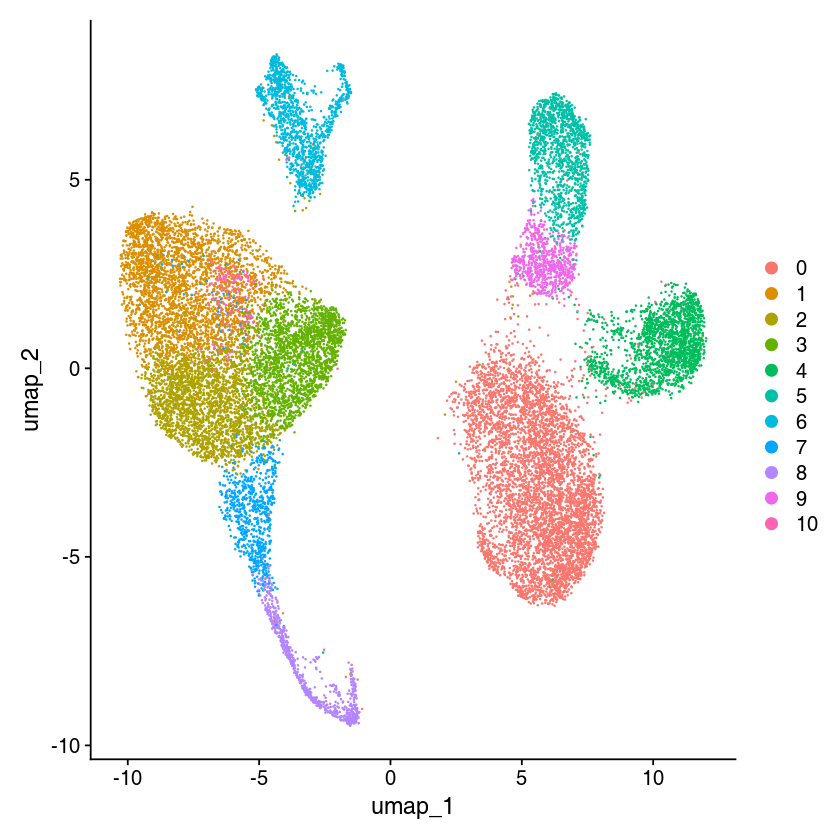

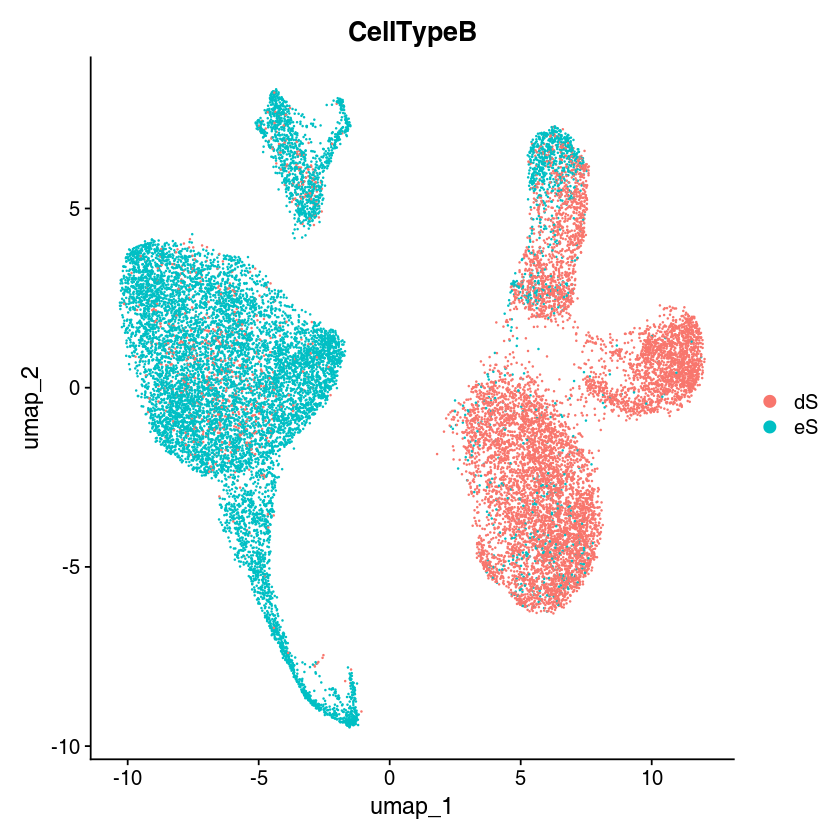

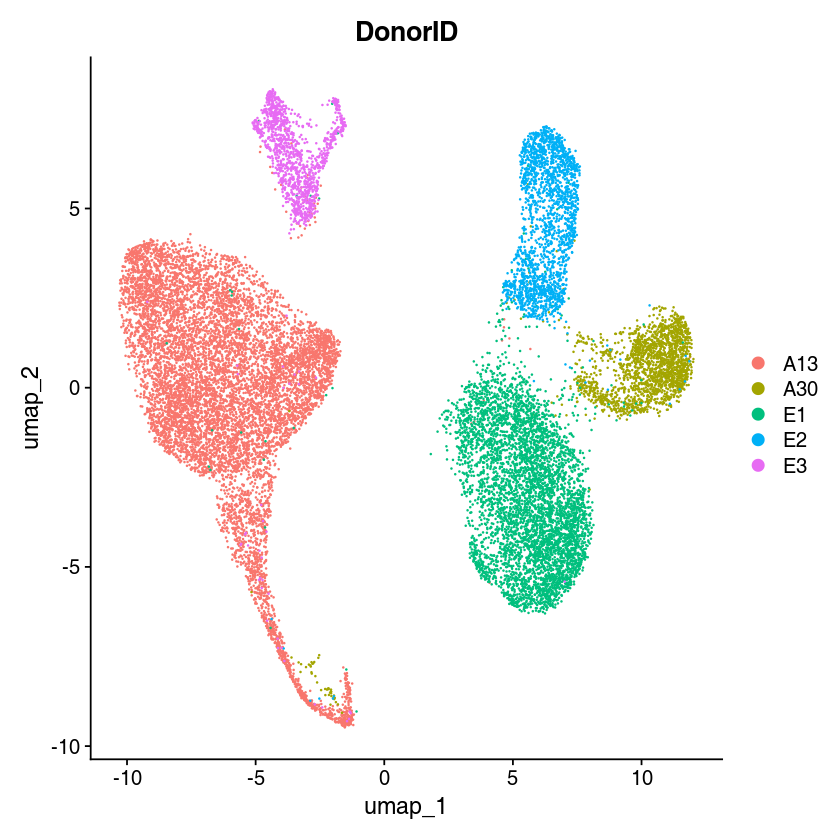

Calculating cluster eS

Calculating cluster dS



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CRABP2,0,3.003991,0.850,0.157,0,eS,CRABP2
RBP7,0,2.904309,0.784,0.159,0,eS,RBP7
MMP11,0,3.485265,0.913,0.312,0,eS,MMP11
PAMR1,0,2.355284,0.855,0.313,0,eS,PAMR1
MFAP2,0,2.567649,0.618,0.115,0,eS,MFAP2
TGFBI,0,2.598997,0.875,0.377,0,eS,TGFBI


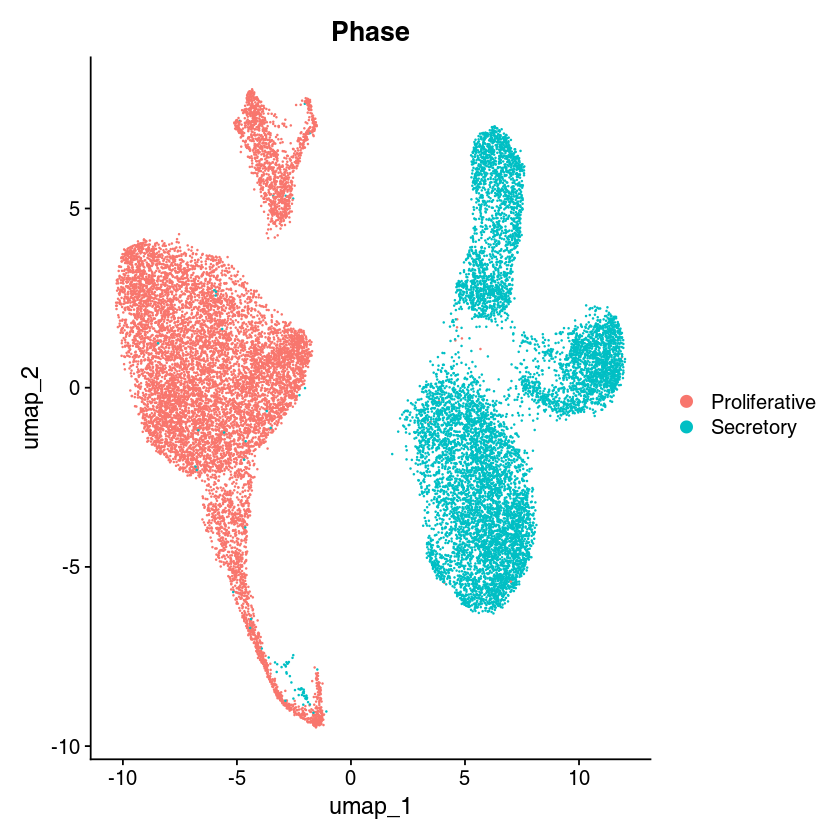

In [17]:
head(combined@meta.data)
stromal<-subset(combined,CellTypeB %in% c("eS","dS"))

stromal[["percent.mt"]] <- PercentageFeatureSet(stromal, pattern = "^MT-")
stromal <- NormalizeData(object = stromal, normalization.method = "LogNormalize", scale.factor = 10000)
stromal <- FindVariableFeatures(object = stromal,selection.method = "vst", nfeatures = 1000)
stromal <- ScaleData(stromal,vars.to.regress = c("nCount_RNA", "percent.mt"))
stromal <- RunPCA(object = stromal)
stromal <- FindNeighbors(stromal, dims = 1:10)
stromal <- FindClusters(stromal, resolution = 0.5)
stromal <- RunUMAP(stromal, dims = 1:10)
DimPlot(stromal)
DimPlot(stromal,group.by="CellTypeB")
DimPlot(stromal,group.by="DonorID")
DimPlot(stromal,group.by="Phase")
Idents(stromal)<-"CellTypeB"

menstrual.markers <- FindAllMarkers(object = stromal, only.pos = TRUE, min.pct = 0.5, thresh.use =1) 
FC1 <- menstrual.markers[menstrual.markers$avg_log2FC>1,]
head(FC1)
dim(FC1)
write.csv(FC1,file="NG_EU_mentrual_makers.csv")
saveRDS(stromal,file="NG_EU_stromals_analysis_byseurat.rds")

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,MMP11,0,5.751132,0.973,0.203,0,PEU,MMP11
2,PAMR1,0,3.782878,0.830,0.148,0,PEU,PAMR1
3,NREP,0,3.220598,0.895,0.249,0,PEU,NREP
4,CRABP2,0,2.966284,0.952,0.311,0,PEU,CRABP2
5,RBP7,0,3.603801,0.698,0.103,0,PEU,RBP7
6,MFAP2,0,2.777300,0.760,0.176,0,PEU,MFAP2


Warning message in DoHeatmap(object = stromal, features = ourMarkers$gene):
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: HLA-A, FBLN1, TIMP1, DCN, HSPB1, SERPINF1, SH3BGRL3, SPTSSA, C20orf27, LGALS3, MFGE8, F10, C1S, TSPO, UBE2L6, RRAS, TRIOBP, RHOBTB3, ENG, SEPP1, RAMP2, PHLDB1, TAGLN2, MAP2K2, MXRA7, PRPS2, INAFM1, PLAC9, CTSH, STOM, FXYD5, TSHZ2, FBLN2, ITM2B, MDK, LY6E, MARCKSL1, HMGN1, NPC2, SLC25A5, EPDR1, TMED9, SRP9, ATP2B1, ZBTB38, CPQ, HINT2, ZNF22, CETN2, ASAH1, C9orf16, IDH2, SLC39A7, CCND2, PALLD, ALDH1A1, ANXA7, HYAL2, FSCN1, CBX1, ARPC1B, TCF4, CDCA7, GJA1, C7orf50, TTC3, PPIC, AR, EDNRA, CLEC11A, FHL2, WLS, CDH11, SMARCB1, TMEM98, MRPS6, QPRT, PTCH1, MRGPRF, PGR, SDC2, ESR1, RAI14, TSC22D1, TAX1BP3, ISOC1, ZNF704, CD24, PCSK5, ADAM12, MFAP2"
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


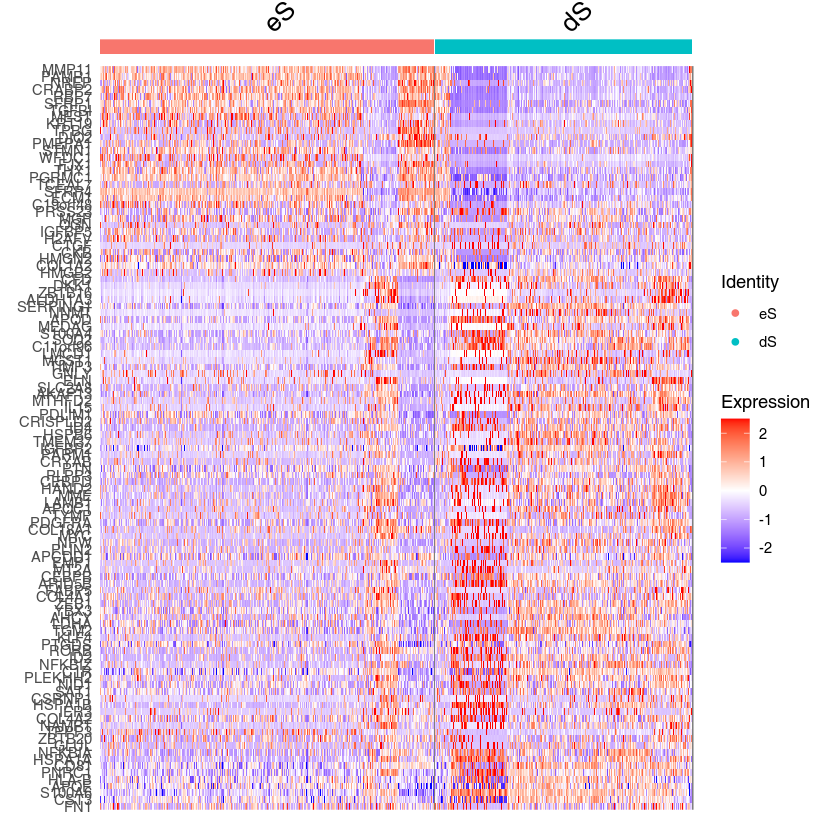

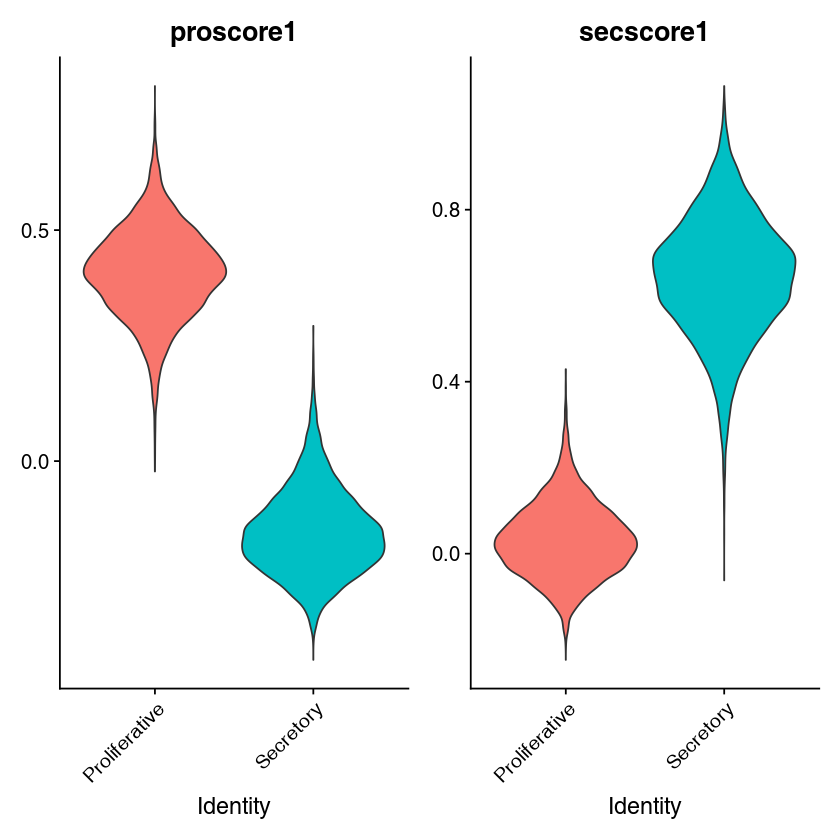

Calculating cluster eS

Calculating cluster dS



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CRABP2,0,3.003991,0.850,0.157,0,eS,CRABP2
RBP7,0,2.904309,0.784,0.159,0,eS,RBP7
MMP11,0,3.485265,0.913,0.312,0,eS,MMP11
PAMR1,0,2.355284,0.855,0.313,0,eS,PAMR1
MFAP2,0,2.567649,0.618,0.115,0,eS,MFAP2
TGFBI,0,2.598997,0.875,0.377,0,eS,TGFBI


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CRABP2,0,3.003991,0.850,0.157,0,eS,CRABP2
RBP7,0,2.904309,0.784,0.159,0,eS,RBP7
MMP11,0,3.485265,0.913,0.312,0,eS,MMP11
PAMR1,0,2.355284,0.855,0.313,0,eS,PAMR1
MFAP2,0,2.567649,0.618,0.115,0,eS,MFAP2
TGFBI,0,2.598997,0.875,0.377,0,eS,TGFBI



 eS  dS 
 85 102 

$eS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1195  0.7636  1.1233  1.2805  1.5825  3.4853 

$dS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1565  0.8850  1.2536  1.3233  1.7062  3.8327 


[1] 0.7647795

[1] 1.280537

[1] 0.6907497

[1] 1.323273

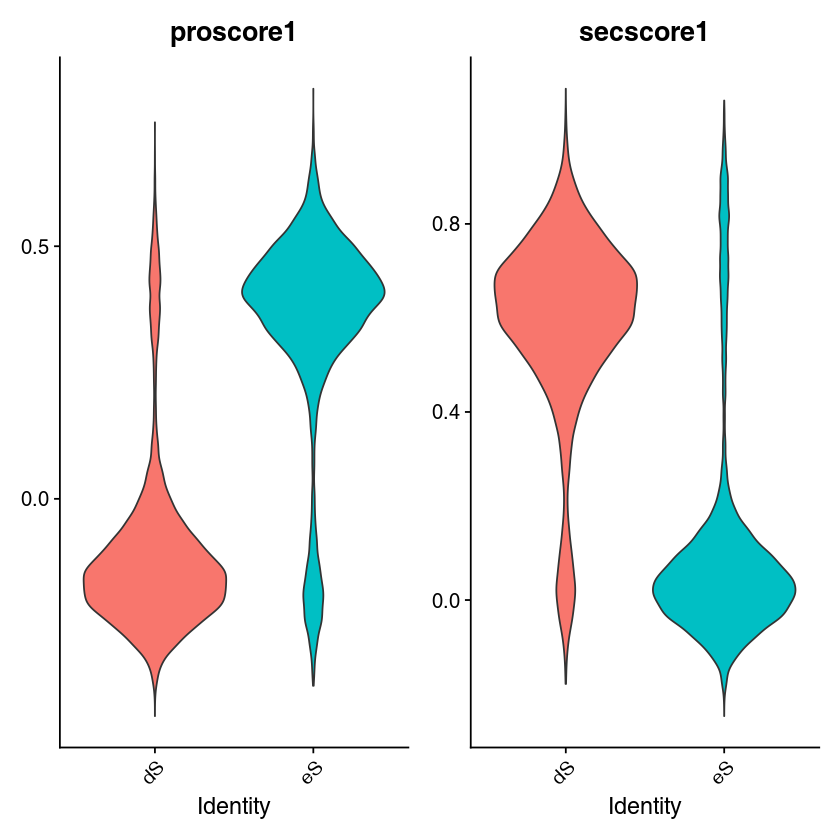

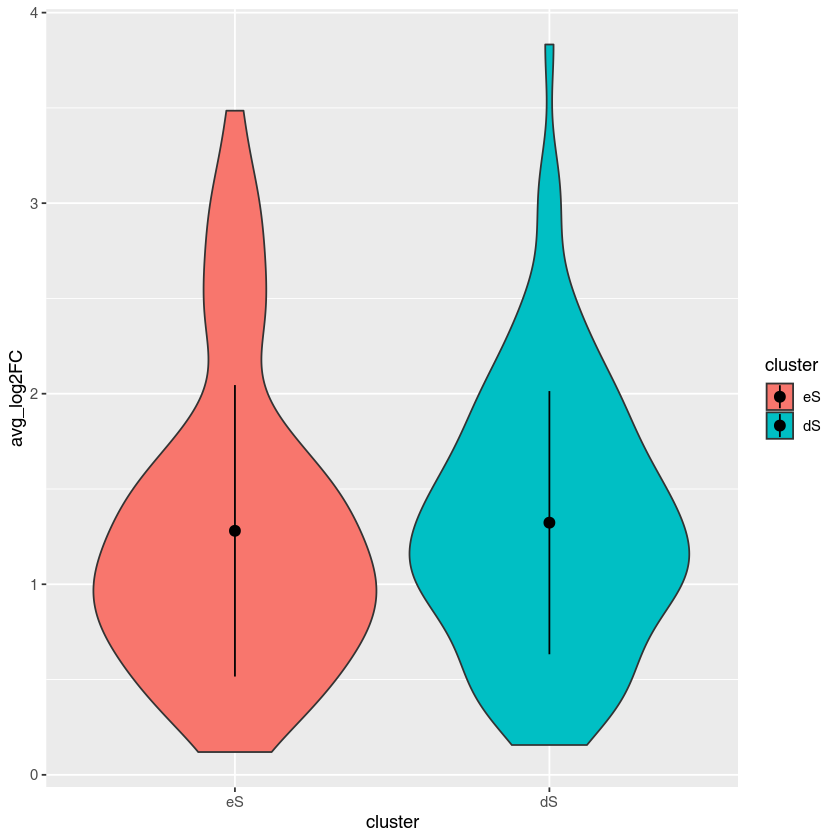

In [4]:
library(Seurat)
library(ggplot2)
stromal<-readRDS(file="NG_EU_stromals_analysis_byseurat.rds")
ourMarkers<-read.csv(file="/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/R_reanalyse/EUstroma/13EU_Menstrual_makers_FC1.csv")
head(ourMarkers)
DoHeatmap(object = stromal, features = ourMarkers$gene)+scale_fill_gradientn(colors=c("blue","white","red"))

progene<-list(ourMarkers$gene[ourMarkers$cluster=="PEU"])
secgene<-list(ourMarkers$gene[ourMarkers$cluster=="SEU"])
stromal<-AddModuleScore(stromal,features=progene,ctrl=100,name="proscore")
stromal<-AddModuleScore(stromal,features=secgene,ctrl=100,name="secscore")

VlnPlot(stromal,features=c("proscore1","secscore1"),pt.size=0,group.by="Phase")
VlnPlot(stromal,features=c("proscore1","secscore1"),pt.size=0,group.by="CellTypeB")

All.markers <- FindAllMarkers(object = stromal, only.pos = TRUE) 
head(All.markers)
sharemarker<-All.markers[All.markers$gene %in% ourMarkers$gene,]
head(sharemarker)
sharemarker<-sharemarker[sharemarker$p_val_adj < 0.05,]
table(sharemarker$cluster)
tapply(sharemarker$avg_log2FC,sharemarker$cluster,summary)
sd(sharemarker$avg_log2FC[sharemarker$cluster=="eS"])
mean(sharemarker$avg_log2FC[sharemarker$cluster=="eS"])
sd(sharemarker$avg_log2FC[sharemarker$cluster=="dS"])
mean(sharemarker$avg_log2FC[sharemarker$cluster=="dS"])
ggplot(sharemarker,aes(x=cluster,y=avg_log2FC,fill=cluster))+geom_violin()+stat_summary(fun.data="mean_sdl", fun.args = list(mult=1),geom="pointrange")